In [3]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# Model / data parameters
num_classes = 10 

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(type(x_train))
print(x_train.shape)

print(type(y_train))
print(y_train.shape)



<class 'numpy.ndarray'>
(60000, 28, 28)
<class 'numpy.ndarray'>
(60000,)


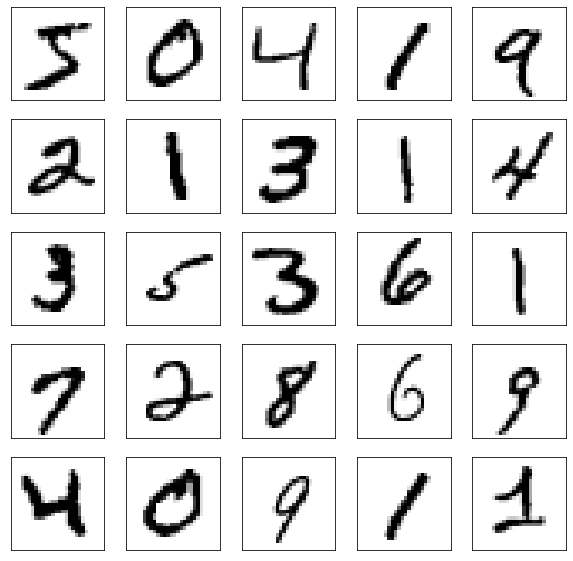

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i,image in enumerate(x_train[0:25]):
    #image = imge.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    #plt.xlabel(class_names[label])
plt.show()

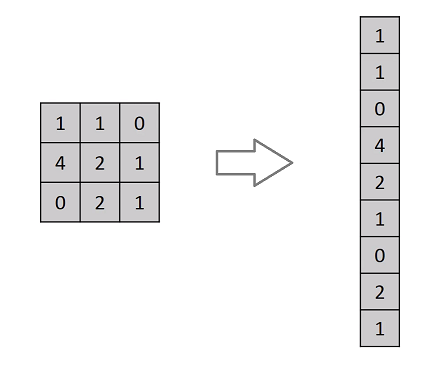

In [4]:
#convert each image of size 28*28 (2d-vector) into a 1D vector of 1*784
# Reshape the data - MLPs do not understand such things as '2D'.
# Reshape to 28 x 28 pixels = 784 features
feature_vector_length = 784
x_train = x_train.reshape(x_train.shape[0], feature_vector_length)
x_test = x_test.reshape(x_test.shape[0], feature_vector_length)
print(x_train.shape)
print(x_test.shape)

print(x_train[0])
print("max pixel values : ",np.max(x_train))
print("min pixel values: ",np.min(x_train))


(60000, 784)
(10000, 784)
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 

In [5]:
#TO DO: 

x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

#print(x_train.shape[0], "train samples")
#print(x_test.shape[0], "test samples")

print(x_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

(60000, 28, 28)
label : 5


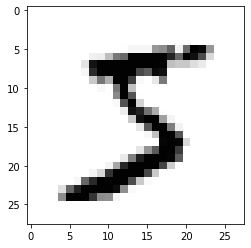

In [6]:
# Visualize one sample
import matplotlib.pyplot as plt

x_train_vis = x_train.reshape(x_train.shape[0], 28, 28)
print(x_train_vis.shape)
print("label :",y_train[0])
plt.imshow(x_train_vis[0], cmap='Greys')
plt.show()

In [7]:
num_classes = 10


In [8]:
#TO DO: model
model_vanilla = keras.Sequential()

model_vanilla.add(layers.Dense( num_classes, activation="softmax",input_shape = (784,)))

2022-11-03 21:03:23.130976: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


**Softmax**

The softmax function is a function that turns a vector of K real values into a vector of K real values that sum to 1. The input values can be positive, negative, zero, or greater than one, but the softmax transforms them into values between 0 and 1, so that they can be interpreted as probabilities. If one of the inputs is small or negative, the softmax turns it into a small probability, and if an input is large, then it turns it into a large probability, but it will always remain between 0 and 1. (The high value will have the higher probability than other values.)


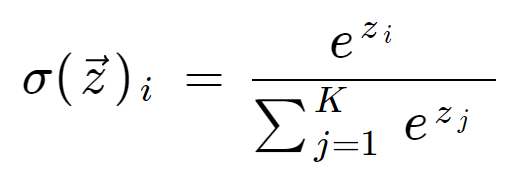

Many multi-layer neural networks end in a penultimate layer which outputs real-valued scores that are not conveniently scaled and which may be difficult to work with. Here the softmax is very useful because it converts the scores to a normalized probability distribution, which can be displayed to a user or used as input to other systems. For this reason it is usual to append a softmax function as the final layer of the neural network.

More info : https://deepai.org/machine-learning-glossary-and-terms/softmax-layer

In [15]:
from scipy.special import softmax
x = [5,6,-3,5,-0.7,4]
print(softmax(x))
print(np.sum(softmax(x)))

[1.96469726e-01 5.34060086e-01 6.59082506e-05 1.96469726e-01
 6.57380917e-04 7.22771730e-02]
0.9999999999999998


In [9]:
#TO DO : summary
model_vanilla.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


Cross-Entropy -   It is a measure of the degree of dissimilarities between two probability distribution

Cross-entropy loss, or log loss, measures the performance of a classification model whose output is a probability value between 0 and 1. Cross-entropy loss increases as the predicted probability diverges from the actual label. So predicting a probability of .012 when the actual observation label is 1 would be bad and result in a high loss value. A perfect model would have a log loss of 0.

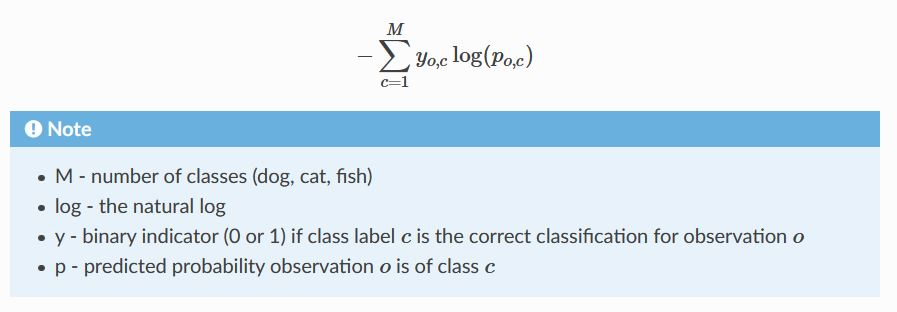

In [10]:
#TO DO : complile and fit
batch_size = 128
epochs = 15
#crossentropy

model_vanilla.compile(loss ="sparse_categorical_crossentropy",optimizer = "adam", metrics=["accuracy"])
history = model_vanilla.fit(x_train,y_train, batch_size= batch_size, epochs= epochs, validation_split=0.1) #validation_data = (x_test,y_test)

Epoch 1/15
422/422 [==============================] - 2s 2ms/step - loss: 0.7062 - accuracy: 0.8269 - val_loss: 0.3523 - val_accuracy: 0.9170
Epoch 2/15
422/422 [==============================] - 1s 2ms/step - loss: 0.3787 - accuracy: 0.8984 - val_loss: 0.2861 - val_accuracy: 0.9257
Epoch 3/15
422/422 [==============================] - 1s 1ms/step - loss: 0.3320 - accuracy: 0.9088 - val_loss: 0.2643 - val_accuracy: 0.9302
Epoch 4/15
422/422 [==============================] - 1s 1ms/step - loss: 0.3100 - accuracy: 0.9140 - val_loss: 0.2509 - val_accuracy: 0.9318
Epoch 5/15
422/422 [==============================] - 1s 2ms/step - loss: 0.2973 - accuracy: 0.9172 - val_loss: 0.2432 - val_accuracy: 0.9337
Epoch 6/15
422/422 [==============================] - 1s 2ms/step - loss: 0.2885 - accuracy: 0.9201 - val_loss: 0.2377 - val_accuracy: 0.9365
Epoch 7/15
422/422 [==============================] - 1s 1ms/step - loss: 0.2819 - accuracy: 0.9211 - val_loss: 0.2328 - val_accuracy: 0.9373
Epoch 

In [22]:
#TO DO: evaluate
score = model_vanilla.evaluate(x_test,y_test)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
#TO DO: predict class

predict_x= model_vanilla.predict(x_test[:1]) 
classes_x=np.argmax(predict_x,axis=1)
print(classes_x)

#model_vanilla.predict_classes(x_test[:1])

313/313 [==============================] - 1s 3ms/step - loss: 0.2646 - accuracy: 0.9265
Test loss: 0.2646118402481079
Test accuracy: 0.9265000224113464
[7]


(28, 28)


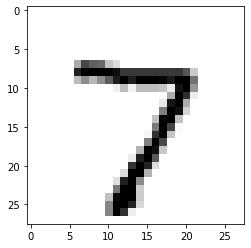

In [11]:
import matplotlib.pyplot as plt
x_test_vis = x_test[0].reshape(28, 28)
print(x_test_vis.shape)
plt.imshow(x_test_vis, cmap = plt.cm.binary)

In [12]:
#TO DO : prediction
predictions_single = model_vanilla.predict(x_test[:1])

print(predictions_single)
print(np.sum(predictions_single))

[[3.9332549e-06 4.2648048e-11 1.1752064e-05 5.1201545e-03 4.7165690e-07
  2.1679352e-05 6.1779892e-10 9.9443722e-01 1.5721846e-05 3.8910049e-04]]
1.0000001


In [15]:
#TO DO: add more layers
model  = keras.Sequential() 

#model.add(layers.Flatten(input_shape=(28, 28)))

model.add(layers.Dense(512, activation= "relu", input_shape=(784,)))
#model.add(layers.Dropout(0.2))
model.add(layers.Dense(256, activation = "relu"))
#model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation= "softmax"))




In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 512)               401920    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [16]:
batch_size = 128
epochs = 15
#crossentropy

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

#history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test,y_test))

Epoch 1/15
469/469 [==============================] - 4s 7ms/step - loss: 0.2253 - accuracy: 0.9337 - val_loss: 0.0963 - val_accuracy: 0.9712
Epoch 2/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0820 - accuracy: 0.9748 - val_loss: 0.0748 - val_accuracy: 0.9771
Epoch 3/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0500 - accuracy: 0.9847 - val_loss: 0.0899 - val_accuracy: 0.9730
Epoch 4/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0387 - accuracy: 0.9872 - val_loss: 0.0769 - val_accuracy: 0.9772
Epoch 5/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0276 - accuracy: 0.9912 - val_loss: 0.0693 - val_accuracy: 0.9799
Epoch 6/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0222 - accuracy: 0.9927 - val_loss: 0.0932 - val_accuracy: 0.9749
Epoch 7/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0190 - accuracy: 0.9936 - val_loss: 0.0809 - val_accuracy: 0.9782
Epoch 

In [17]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

predict_x= model.predict(x_test[:1]) 
classes_x=np.argmax(predict_x,axis=1)
print(classes_x)
#model.predict_classes(x_test[:1])

Test loss: 0.09985578060150146
Test accuracy: 0.9783999919891357
[7]


In [18]:
history #press "dot" to see list

In [19]:
history.history

{'loss': [0.2252972275018692,
  0.08202599734067917,
  0.04999472573399544,
  0.03866273909807205,
  0.02756359986960888,
  0.022231534123420715,
  0.018976308405399323,
  0.015378144569694996,
  0.014731602743268013,
  0.01074120681732893,
  0.012665998190641403,
  0.013325703330338001,
  0.01041781809180975,
  0.0068085393868386745,
  0.01009140070527792],
 'accuracy': [0.9336666464805603,
  0.9748499989509583,
  0.9847333431243896,
  0.9872333407402039,
  0.9912166595458984,
  0.9926999807357788,
  0.9936166405677795,
  0.9948499798774719,
  0.9949666857719421,
  0.996150016784668,
  0.9957166910171509,
  0.9956333041191101,
  0.9964333176612854,
  0.9976333379745483,
  0.9964333176612854],
 'val_loss': [0.0963193029165268,
  0.07484704256057739,
  0.08988500386476517,
  0.07693126052618027,
  0.06933117657899857,
  0.09315314888954163,
  0.08093682676553726,
  0.08006363362073898,
  0.0891105979681015,
  0.09527957439422607,
  0.08792271465063095,
  0.08954738825559616,
  0.0914359

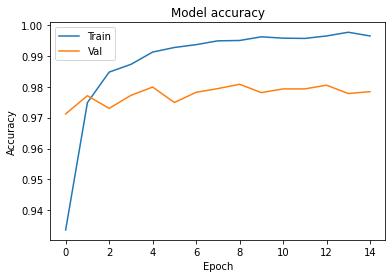

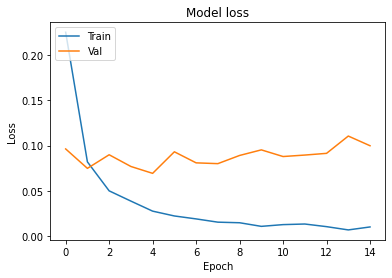

In [20]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [21]:
model.save('./models/model.h5')

In [36]:
pip install emnist

In [1]:
from emnist import list_datasets
list_datasets()

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

In [4]:
from emnist import extract_training_samples
images, labels = extract_training_samples('letters')
print(images.shape)
print(labels.shape)
print(type(images))
print(np.unique(labels).shape)
print(len(np.unique(labels)))

images = images.astype("float32") / 255

from sklearn.model_selection import train_test_split
X_train_library, X_test_library, y_train_library, y_test_library = train_test_split(images, labels, test_size = 0.3, random_state = 42)
print(X_train_library.shape)
print(X_test_library.shape)
print(y_train_library.shape)
print(y_test_library.shape)
print(y_train_library[:30])




(124800, 28, 28)
(124800,)
<class 'numpy.ndarray'>
(26,)
26
(87360, 28, 28)
(37440, 28, 28)
(87360,)
(37440,)
[20  6  5 11  5 12 13 12 16 16 21  2 17 26 17 16  9 17 11 25 21 25  7  7
  1  1  2  2 23 14]


In [5]:
y_train_library = y_train_library-1
y_test_library = y_test_library-1

In [6]:
print(y_train_library[:30])
#train_y_library = keras.utils.to_categorical(y_train_library)
#test_y_library = keras.utils.to_categorical(y_test_library)
print(y_train_library[0].shape)
#print((y_train_library[0]))

[19  5  4 10  4 11 12 11 15 15 20  1 16 25 16 15  8 16 10 24 20 24  6  6
  0  0  1  1 22 13]
()


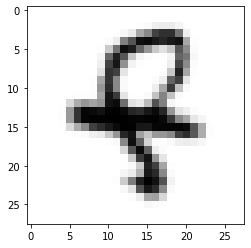

In [7]:
import matplotlib.pyplot as plt
#letter_vis =  np.squeeze(x_train[0])
#print(images[0])
plt.imshow(X_train_library[1], cmap = "Greys")

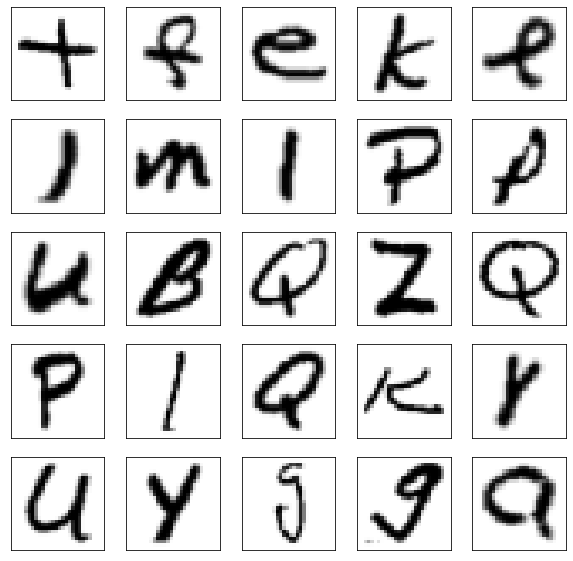

In [8]:
plt.figure(figsize=(10,10))
for i,image in enumerate(X_train_library[0:25]):
    #image = imge.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    #plt.xlabel(class_names[label])
plt.show()

In [9]:
X_train_library = X_train_library.reshape(X_train_library.shape[0], X_train_library.shape[1]* X_train_library.shape[2])
X_test_library = X_test_library.reshape(X_test_library.shape[0], X_test_library.shape[1]* X_test_library.shape[2])
print(X_train_library.shape)
print(X_test_library.shape)

(87360, 784)
(37440, 784)


In [10]:
model_letters_library  = keras.Sequential()

model_letters_library.add(layers.Dense(512, activation='relu', input_shape=(784,)))
#model_letters_library.add(layers.Dropout(0.2))
model_letters_library.add(layers.Dense(256, activation='relu'))
#model_letters_library.add(layers.Dropout(0.3))
model_letters_library.add(layers.Dense(27, activation='softmax'))

2022-11-03 21:31:36.656853: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
model_letters_library.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 27)                6939      
                                                                 
Total params: 540,187
Trainable params: 540,187
Non-trainable params: 0
_________________________________________________________________


In [12]:
batch_size = 128
epochs = 16

#model_letters_library.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model_letters_library.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
#model_letters_library.compile(loss="categorical_crossentropy", optimizer="adam", metrics=[keras.metrics.Recall()])
#model_letters_library.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


#history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
#history = model_letters_library.fit(X_train_library, train_y_library, batch_size=batch_size, epochs=epochs, validation_data=(X_test_library,test_y_library))
history_library = model_letters_library.fit(X_train_library, y_train_library, batch_size=batch_size, epochs=epochs, validation_data=(X_test_library,y_test_library))

Epoch 1/16
683/683 [==============================] - 6s 8ms/step - loss: 0.7001 - accuracy: 0.7918 - val_loss: 0.4322 - val_accuracy: 0.8655
Epoch 2/16
683/683 [==============================] - 5s 7ms/step - loss: 0.3501 - accuracy: 0.8879 - val_loss: 0.3617 - val_accuracy: 0.8835
Epoch 3/16
683/683 [==============================] - 4s 6ms/step - loss: 0.2723 - accuracy: 0.9105 - val_loss: 0.3214 - val_accuracy: 0.8979
Epoch 4/16
683/683 [==============================] - 7s 10ms/step - loss: 0.2266 - accuracy: 0.9223 - val_loss: 0.2990 - val_accuracy: 0.9031
Epoch 5/16
683/683 [==============================] - 7s 10ms/step - loss: 0.1925 - accuracy: 0.9327 - val_loss: 0.2939 - val_accuracy: 0.9089
Epoch 6/16
683/683 [==============================] - 6s 8ms/step - loss: 0.1697 - accuracy: 0.9394 - val_loss: 0.3000 - val_accuracy: 0.9075
Epoch 7/16
683/683 [==============================] - 4s 6ms/step - loss: 0.1462 - accuracy: 0.9466 - val_loss: 0.3074 - val_accuracy: 0.9089
Epoc

In [51]:
#score = model_letters_library.evaluate(X_test_library, test_y_library, verbose=0)

#print("Test loss:", score[0])
#print("Test accuracy:", score[1])

In [13]:
score = model_letters_library.evaluate(X_test_library, y_test_library, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.4195311665534973
Test accuracy: 0.9047542810440063


(28, 28)


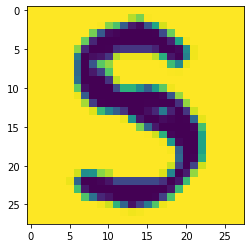

In [65]:
import cv2
pathImage = "./test/15.png"
#pathImage = "./img/maze_5.jpg"
# load the example image
img = cv2.imread(pathImage, 0)
img = img/255
print(img.shape)
plt.imshow(img)
plt.show()

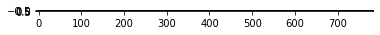

In [66]:
roi = img.reshape(1, img.shape[0]*img.shape[1])
plt.imshow(roi, cmap='gray', vmin=0, vmax=255)
plt.show()

In [67]:
predictions = model_letters_library.predict(roi)
classIndex = np.argmax(predictions, axis=-1)
print(classIndex)

[12]


In [64]:
model_letters_library.save('./models/model.h5')